### 1. Testing the development environment

In [2]:
import cv2
import numpy as np
import dlib

# Checking the OpenCV version
print("OpenCV version", cv2.__version__)

# Checking the Numpy version
print("Numpy version", np.__version__)

# Checking the dlib version
print("Dlib version", dlib.__version__)




OpenCV version 3.2.0-dev
Numpy version 1.13.1
Dlib version 19.4.0


We will be using the Yale Image dataset for this example

Link to the dataset : http://vismod.media.mit.edu/vismod/classes/mas622-00/datasets/

In [28]:
# Rendering PCA images

from PIL import Image
from numpy import *

def pca(X):
    # Principal Component Analysis
    # input: X, matrix with training data as flattened arrays in rows
    # return: projection matrix (with important dimensions first),
    # variance and mean

    #get dimensions
    num_data,dim = X.shape

    #center data
    mean_X = X.mean(axis=0)
    for i in range(num_data):
        X[i] -= mean_X

    if dim>100:
        print('PCA - compact trick used')
        M = dot(X,X.T) #covariance matrix
        e,EV = linalg.eigh(M) #eigenvalues and eigenvectors
        tmp = dot(X.T,EV).T #this is the compact trick
        V = tmp[::-1] #reverse since last eigenvectors are the ones we want
        S = sqrt(e)[::-1] #reverse since eigenvalues are in increasing order
    else:
        U,S,V = linalg.svd(X)
        V = V[:num_data] 
    return V,S,mean_X

### 2. Eigen Face

In [4]:
class PCA:
    pass

In [5]:
import os
import glob
import numpy as np
from PIL import Image
import skimage.transform
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

INPUT_IMG_DIR = os.path.join("..","..","datasets","yalefaces","yalefaces", "subject01*")
SIZE = 100 * 100    # w x h 

class EigenFace():
    
    def __init__(self, img_path,size=SIZE):
        self.image_bin = {}
        image_lst = [ image for image in glob.glob(img_path)]
        for image in image_lst:
            im = mpimg.imread(image)
            size = im.shape[0]*im.shape[1]
            
            # finding the downsample factor for the image
            d_sample_factor = size / SIZE
            im = skimage.transform.pyramid_reduce(im, downscale=d_sample_factor)
            
            # we will be storing the image and its pixel map in gray scale as a dictionary
            if len(im.shape) > 2:
                self.image_bin[image] = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
            else:
                self.image_bin[image] = im
                
            # calculating the vector representation of the Images
        self.vector_matrix = self.get_vector()
            
            
                
    def get_vector(self):
        """
        Representing an Image Sample in the vector form and concatenating together
        """
        
        for idx, (_, image) in enumerate(self.image_bin.items()):
            if idx == 0:
                 vector_2d = self.image_bin[list(self.image_bin.keys())[0]].flatten()
            else:
                vector = image.flatten()
                vector_2d = np.concatenate((vector_2d.T, vector.T), axis=0)
        vector_2d = np.reshape(vector_2d, (len(self.image_bin), vector.size))
        return vector_2d
    
    
    def get_pca(self):
        """
        Getting the PCA of images
        """
        mean_vector = self.vector_matrix.mean(axis=0)
        for idx in range(self.vector_matrix.shape[0]):
            self.vector_matrix[idx] -= mean_vector
            
        u, s, eigen_vector = np.linalg.svd(np.dot(self.vector_matrix.T, self.vector_matrix))
        standard_deviation = s**2/float(len(s))
        variance_proportion = standard_deviation / np.sum(standard_deviation)
        pca = PCA()
        pca.s = s
        pca.eigen_vector = eigen_vector[:self.vector_matrix.shape[0]]
        pca.variance_proportion = variance_proportion
        pca.mean_vector = mean_vector
        return pca

### Principal Component Analysis

In [6]:
eigen_face = EigenFace(INPUT_IMG_DIR)

In [7]:
pca = eigen_face.get_pca()

#### Get the eigen vector of the set of images

In [17]:
print(pca.eigen_vector)

[[ -3.63672995e-02  -3.69477338e-02  -3.70500937e-02 ...,  -1.20163934e-02
   -1.28206317e-02  -1.45080901e-02]
 [ -9.75876909e-03  -9.97222936e-03  -1.00101896e-02 ...,   1.18954297e-02
    1.16996728e-02   1.13026447e-02]
 [ -6.53986895e-03  -6.66773643e-03  -6.69041471e-03 ...,   4.09884969e-03
    3.98117640e-03   3.82295449e-03]
 ..., 
 [ -3.14072712e-03  -3.19177714e-03  -3.20078491e-03 ...,  -1.29591577e-03
   -1.65366444e-03  -1.84131297e-03]
 [  1.26215551e-03   1.28362529e-03   1.28741876e-03 ...,  -1.89229065e-04
   -6.97612812e-04  -2.26109565e-03]
 [  9.42334727e-03  -4.75919592e-01   1.01841583e-02 ...,  -3.46244457e-03
   -2.21350962e-03   2.84255675e-04]]


#### Get the feature size of the eigen vector

In [19]:
print(pca.eigen_vector.shape[1])

1344


### 2. Face Recognition using Eigen Faces

Loading faces for training
0 - ../images/train_face_data/Agnetha_Faltskog/5b8fa4e7-08f1-4c7b-a1f8-f21a04277908.png
1 - ../images/train_face_data/Agnetha_Faltskog/b3864b30-2de4-4e84-a895-d5725237f4a5.png
2 - ../images/train_face_data/Agnetha_Faltskog/c672cc8c-359d-4de2-8f23-5aa2415c0a23.png
3 - ../images/train_face_data/Agnetha_Faltskog/c74b6b2c-091c-4a48-b20a-87a0f8a68e61.png
4 - ../images/train_face_data/Agnetha_Faltskog/e6f767f5-0afc-47b0-89cd-4b59393b60b6.png
5 - ../images/train_face_data/Agnetha_Faltskog/fe4f69c2-d8c4-4472-940e-b21119df427f.png
6 - ../images/train_face_data/AnniFrid_Lyngstad/2d2d3881-bd51-4cdb-84a3-783eb8c0b4c2.png
7 - ../images/train_face_data/AnniFrid_Lyngstad/35429131-7694-4c28-9021-300bb0bda860.png
8 - ../images/train_face_data/AnniFrid_Lyngstad/6912da17-3515-4aba-81c6-2a777104764f.png
9 - ../images/train_face_data/AnniFrid_Lyngstad/69784a41-8a1f-48d6-8538-ee9723e11a1d.png
10 - ../images/train_face_data/AnniFrid_Lyngstad/6a560ccd-29ec-4b32-b209-379d2f4f412c.png

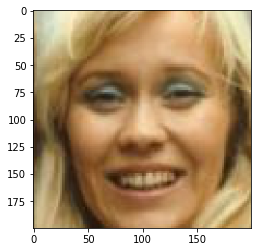

Predicted Face : Agnetha


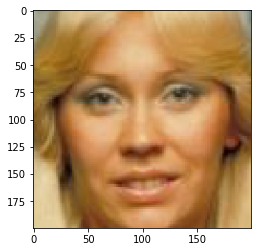

Sample Face : Agnetha


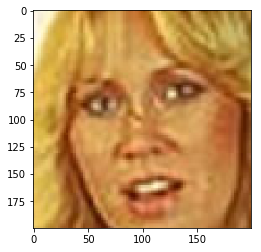

Predicted Face : Agnetha


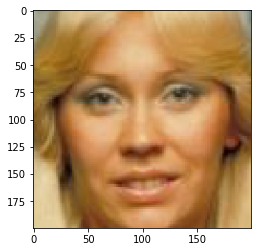

Sample Face : AnniFrid


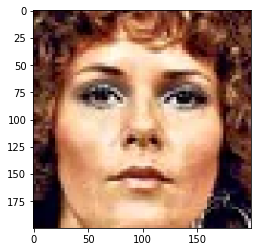

Predicted Face : AnniFrid


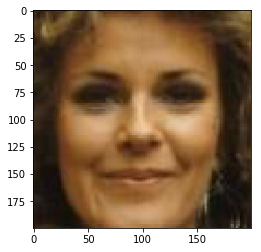

Sample Face : AnniFrid


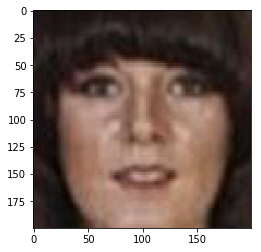

Predicted Face : AnniFrid


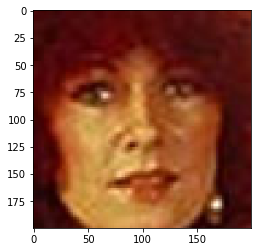

Sample Face : Benny


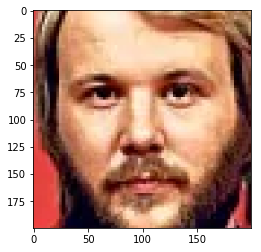

Predicted Face : Benny


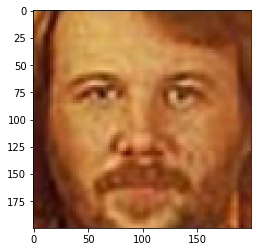

Sample Face : Benny


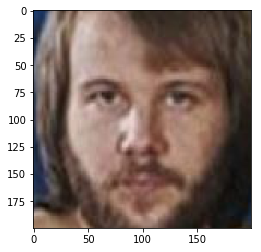

Predicted Face : Benny


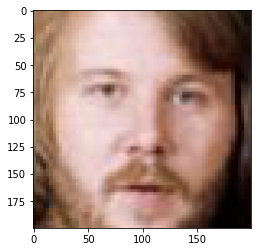

Sample Face : Bjorn


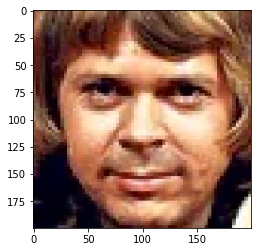

Predicted Face : Bjorn


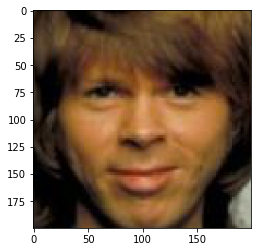

Sample Face : Bjorn


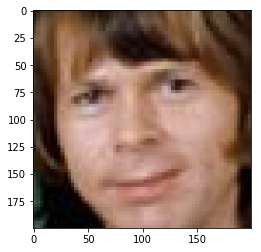

Predicted Face : AnniFrid


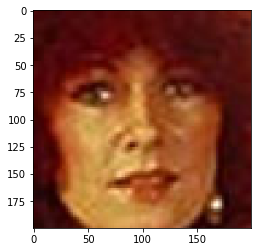

In [77]:
import cv2
import glob
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

def get_images_and_labels(files):
    print("Loading faces for training")
    images = []
    labels = []

    c = 0
    for f in files:
        print(c, "-", f)
        images.append(prepare_image(f))
        labels.append(c)
        c = c+1
    return images, labels

#---------------------------------------------------------------------------
# Load the image file, convert	to greyscale, normalize brightness and
# return the image
def prepare_image(filename):
	img = cv2.imread(filename)
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	img = cv2.equalizeHist(img)
	return img


def predict_face(fName):
    
    img = prepare_image(fName)

    collector = cv2.face.StandardCollector_create()
    recognizer.predict_collect(img, collector)
    dist = collector.getMinDist()
    nbr_predicted = collector.getMinLabel()
    x = faceFiles[nbr_predicted].split(" ")
    
    print("Sample Face : {0}".format(fName.split("/")[-1][:-5]))
    plt.imshow(mpimg.imread(fName))
    plt.show()
    
    print("Predicted Face : {0}".format(x[0].split("/")[-2].split("_")[0]))
    plt.imshow(mpimg.imread(x[0]))
    
    plt.show()
    
    
# Create a instance of eigen face recognizer    
recognizer = cv2.face.createEigenFaceRecognizer()

TRAIN_IMG_PATH = os.path.join("..","images","train_face_data")
TEST_IMG_PATH = os.path.join("..","images","test_face_data")

faceFiles = glob.glob(os.path.join(TRAIN_IMG_PATH,"*","*.png"))

images, labels = get_images_and_labels(faceFiles)
recognizer.train(images, np.array(labels))


# So that training is done lets do inference
# Load the sample image

for test_image in glob.glob(os.path.join(TEST_IMG_PATH,"*.png")):
    predict_face(os.path.join(test_image))
    #whoIs(os.path.join(TEST_IMG_PATH,"Agnetha1.png"))